## Movie Ratings Analysis

## 1. Import libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## 2. Import Dataset

In [3]:
movieRatings= pd.read_csv("datasets_674388_1186156_tv_shows.csv", index_col= [0])

## 3. Explore Dataset

In [4]:
movieRatings.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [5]:
movieRatings.shape

(5611, 10)

In [6]:
movieRatings.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type
count,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0
mean,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0
std,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0
min,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [7]:
movieRatings.IMDb.describe()

count    4450.000000
mean        7.113258
std         1.132060
min         1.000000
25%         6.600000
50%         7.300000
75%         7.900000
max         9.600000
Name: IMDb, dtype: float64

## 4. Clean your dataset

In [8]:
movieRatings.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5606    False
5607    False
5608    False
5609    False
5610    False
Length: 5611, dtype: bool

In [9]:
movieRatings.isnull()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5606,False,False,True,True,True,False,False,False,False,False
5607,False,False,True,True,True,False,False,False,False,False
5608,False,False,True,True,True,False,False,False,False,False
5609,False,False,True,True,True,False,False,False,False,False


In [10]:
movieRatings.dropna(axis=0, how='any').shape

(931, 10)

In [11]:
movieRatings.dropna(axis=0, how='any', inplace= True)

In [12]:
movieRatings.isnull()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5509,False,False,False,False,False,False,False,False,False,False
5517,False,False,False,False,False,False,False,False,False,False
5522,False,False,False,False,False,False,False,False,False,False
5530,False,False,False,False,False,False,False,False,False,False


In [13]:
movieRatings.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
type                 int64
dtype: object

## Questions 1: What are the top 10 rated movies according to Rotten Tomatoes?

In [14]:
movieRatings.rename(columns = {"Rotten Tomatoes": "RottenTomatoes"}, inplace= True)

In [15]:
movieRatings.head()

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [16]:
movieRatings['RottenTomatoes']= movieRatings.RottenTomatoes.apply(lambda x: x.replace("%", " ")).astype("int64")

In [17]:
movieRatings.RottenTomatoes.dtype

dtype('int64')

In [18]:
movieRatings.sort_values(by = "RottenTomatoes", ascending= False)

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
89,Fauda,2015,16+,8.3,100,1,0,0,0,1
742,Final Fantasy XIV: Dad of Light,2017,7+,7.2,100,1,0,0,0,1
1972,Black Books,2000,7+,8.5,100,0,1,1,0,1
2025,Inside No. 9,2014,18+,8.5,100,0,1,0,0,1
92,Big Mouth,2017,18+,8.0,100,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5506,Marvel's Inhumans,2017,7+,5.0,11,0,0,0,1,1
2540,Rosewood,2015,16+,6.7,9,0,1,0,0,1
2958,Saved by the Bell: The College Years,1993,7+,6.3,9,0,1,0,0,1
840,The I-Land,2019,18+,4.5,8,1,0,0,0,1


In [19]:
movieRatings[movieRatings.RottenTomatoes == 100].count()

Title             95
Year              95
Age               95
IMDb              95
RottenTomatoes    95
Netflix           95
Hulu              95
Prime Video       95
Disney+           95
type              95
dtype: int64

In [20]:
TopTenRT= movieRatings.sort_values(by = "RottenTomatoes", ascending= False).head(10)

## Question 2: What are the top ten rated movies on IMDb?

In [21]:
TopTenIMDB= movieRatings.sort_values(by= "IMDb", ascending= False).head(10)

In [22]:
TopTenIMDB

,Title,Year,Age,IMDb,RottenTomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96,1,0,0,0,1
3567,Band of Brothers,2001,18+,9.4,94,0,0,1,0,1
91,Our Planet,2019,7+,9.3,93,1,0,0,0,1
3566,The Wire,2002,18+,9.3,94,0,0,1,0,1
1931,Rick and Morty,2013,18+,9.2,94,0,1,0,0,1
3568,The Sopranos,1999,18+,9.2,92,0,0,1,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,100,1,0,0,0,1
15,Fullmetal Alchemist: Brotherhood,2009,18+,9.1,100,1,1,0,0,1
3,Sherlock,2010,16+,9.1,78,1,0,0,0,1
3649,The Planets,2019,all,9.1,100,0,0,1,0,1


## Question 3: How many movies have a 18+ restriction?

In [23]:
movieRatings[movieRatings["Age"]== "18+"].count()

Title             376
Year              376
Age               376
IMDb              376
RottenTomatoes    376
Netflix           376
Hulu              376
Prime Video       376
Disney+           376
type              376
dtype: int64

## Question 4: How many movies from this dataset were made in 2010 and have an IMDb rating of >= 5?

In [24]:
movieRatings[(movieRatings["IMDb"]>= 5) & (movieRatings['Year']== 2010)].count()

Title             24
Year              24
Age               24
IMDb              24
RottenTomatoes    24
Netflix           24
Hulu              24
Prime Video       24
Disney+           24
type              24
dtype: int64

## Question 5: How many different age categories are there?

In [25]:
Age_groups= movieRatings.Age.unique()

In [26]:
Age_groups

array(['18+', '16+', '7+', 'all', '13+'], dtype=object)

In [27]:
AgeGroups= movieRatings.groupby("Age").Title.count()

In [28]:
AgeGroups

Age
13+      3
16+    359
18+    376
7+     177
all     16
Name: Title, dtype: int64

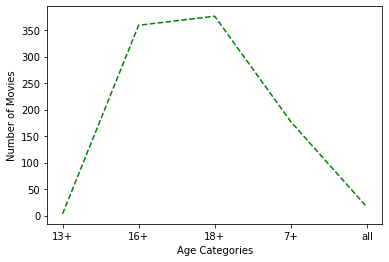

In [29]:
plt.plot(AgeGroups, 'g--')
plt.xlabel("Age Categories")
plt.ylabel("Number of Movies")
plt.show()

## Question 6: Graph number of movies categorized by age restrictions before 2000 and after 2000?

In [30]:
YearGroups= movieRatings.Year.unique()

In [31]:
YearGroups

array([2008, 2016, 2017, 2010, 2015, 2005, 2011, 2013, 2009, 2006, 2019,
       1990, 2014, 2018, 2007, 2003, 2020, 1999, 2012, 1959, 1987, 1966,
       2000, 1995, 1969, 1998, 1993, 1988, 2004, 1992, 2001, 1989, 2002,
       1997, 1991, 1981, 1963, 1978, 1964])

In [32]:
YearGroups.min()

1959

In [33]:
YearGroups.max()

2020

In [34]:
Before2000= movieRatings[(movieRatings.Year <=2000)]

In [35]:
Before2000.count()

Title             60
Year              60
Age               60
IMDb              60
RottenTomatoes    60
Netflix           60
Hulu              60
Prime Video       60
Disney+           60
type              60
dtype: int64

In [36]:
After2000= movieRatings[(movieRatings.Year > 2000)]

In [37]:
After2000.count()

Title             871
Year              871
Age               871
IMDb              871
RottenTomatoes    871
Netflix           871
Hulu              871
Prime Video       871
Disney+           871
type              871
dtype: int64

In [38]:
MoviesBefore2000= Before2000.groupby("Age").Title.count()

In [39]:
MoviesBefore2000

Age
13+     1
16+    14
18+    13
7+     27
all     5
Name: Title, dtype: int64

In [40]:
MoviesAfter2000= After2000.groupby("Age").Title.count()

In [41]:
MoviesAfter2000

Age
13+      2
16+    345
18+    363
7+     150
all     11
Name: Title, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

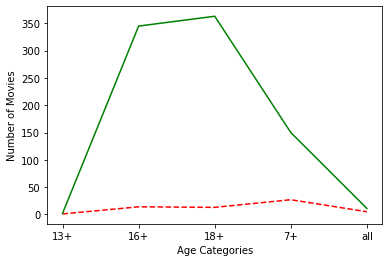

In [42]:
plt.plot(MoviesBefore2000, 'r--')
plt.plot(MoviesAfter2000, 'g')
plt.xlabel ("Age Categories")
plt.ylabel('Number of Movies')
plt.show

## Question 7: Graph the same but using the percentage of the movies

In [43]:
PercentageBefore2000= MoviesBefore2000 / sum(MoviesBefore2000)

In [44]:
PercentageAfter2000= MoviesAfter2000/ sum(MoviesAfter2000)

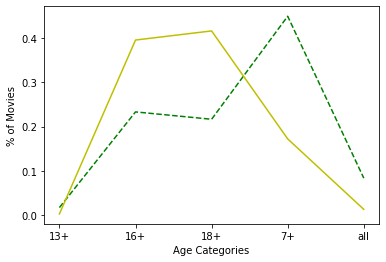

In [45]:
plt.plot(PercentageBefore2000, 'g--')
plt.plot(PercentageAfter2000, 'y')
plt.xlabel("Age Categories")
plt.ylabel("% of Movies")
plt.show()